In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import sys
sys.path.append("..")
from utils.loading_data  import load_to_df_from_csv
from utils.plotting import draw_histogram, plot_scatter

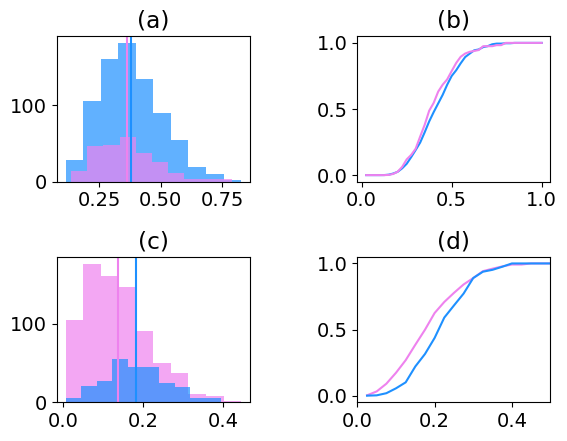

In [27]:
d = load_to_df_from_csv("../data/train.csv")
d["Number of words co-lead"] = d["Number of words lead"] - d["Difference in words lead and co-lead"]
d = d.drop( ["Difference in words lead and co-lead"], axis="columns")
d2 = pd.DataFrame()
lead=list()
colead=list()
femrest=list()
malerest=list()
for i in range(1039):
    lead.append(d.iloc[i,2] / d.iloc[i,1])
    colead.append(d.iloc[i,13] / d.iloc[i,1])
    femrest.append( (d.iloc[i,0] / d.iloc[i,1]))
    malerest.append( (d.iloc[i,6] / d.iloc[i,1]))

d2 = pd.DataFrame( {"lead perc":lead, "colead perc":colead, "fem rest perc":femrest, "male rest perc":malerest, "Lead":d["Lead"], "year":d["Year"], "gross":d["Gross"] } )

ml = d2[d2["Lead"]=="Male"]["lead perc"]
fl = d2[d2["Lead"]=="Female"]["lead perc"]

fc = d2[d2["Lead"]=="Male"]["colead perc"]
mc = d2[d2["Lead"]=="Female"]["colead perc"]

splitting = np.cumsum( [0.025 for i in range(40)] )
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)

axs[0,0].hist(ml, color="dodgerblue", alpha=0.7)
axs[0,0].hist(fl, color="violet", alpha=0.7)
axs[0,0].axvline(x=np.mean(ml) , color = 'dodgerblue', label = 'axvline - full height')
axs[0,0].axvline(x=np.mean(fl) , color = 'violet', label = 'axvline - full height')
axs[0,0].title.set_text("(a)")

axs[0,1].plot(splitting, [sum(ml[ml<i])/sum(ml) for i in splitting], color="dodgerblue")
axs[0,1].plot(splitting, [sum(fl[fl<i])/sum(fl) for i in splitting], color="violet")
axs[0,1].title.set_text("(b)")

axs[1,0].hist(fc, color="violet", alpha=0.7)
axs[1,0].hist(mc, color="dodgerblue", alpha=0.7)
axs[1,0].axvline(x=np.mean(mc) , color = 'dodgerblue', label = 'axvline - full height')
axs[1,0].axvline(x=np.mean(fc) , color = 'violet', label = 'axvline - full height')
axs[1,0].title.set_text("(c)")

axs[1,1].plot(splitting, [sum(fc[fc<i])/sum(fc) for i in splitting], color="violet")
axs[1,1].plot(splitting, [sum(mc[mc<i])/sum(mc) for i in splitting], color="dodgerblue")
plt.xlim([0,0.5])
axs[1,1].title.set_text("(d)")

plt.show()

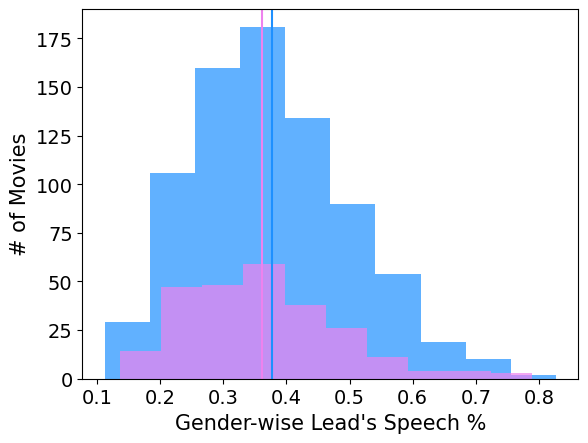

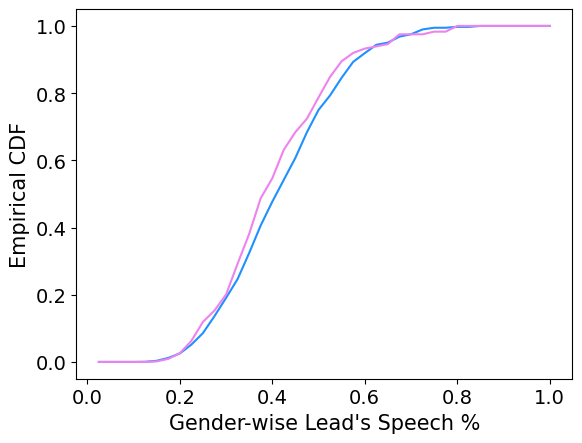

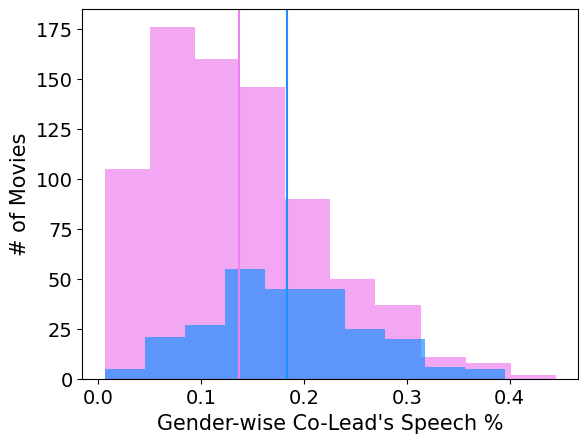

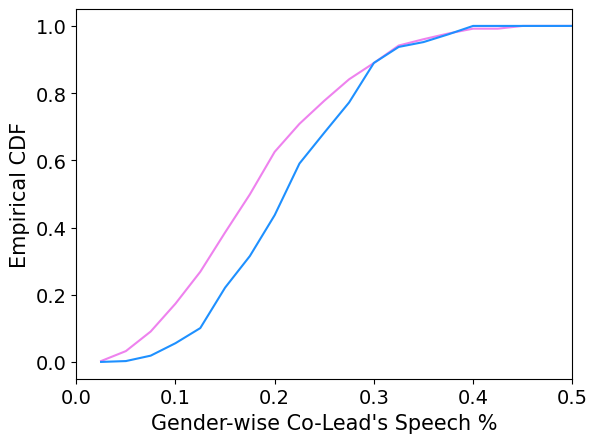

In [29]:
d = load_to_df_from_csv("../data/train.csv")
d["Number of words co-lead"] = d["Number of words lead"] - d["Difference in words lead and co-lead"]
d = d.drop( ["Difference in words lead and co-lead"], axis="columns")
d2 = pd.DataFrame()
lead=list()
colead=list()
femrest=list()
malerest=list()
for i in range(1039):
    lead.append(d.iloc[i,2] / d.iloc[i,1])
    colead.append(d.iloc[i,13] / d.iloc[i,1])
    femrest.append( (d.iloc[i,0] / d.iloc[i,1]))
    malerest.append( (d.iloc[i,6] / d.iloc[i,1]))

d2 = pd.DataFrame( {"lead perc":lead, "colead perc":colead, "fem rest perc":femrest, "male rest perc":malerest, "Lead":d["Lead"], "year":d["Year"], "gross":d["Gross"] } )

ml = d2[d2["Lead"]=="Male"]["lead perc"]
fl = d2[d2["Lead"]=="Female"]["lead perc"]

fc = d2[d2["Lead"]=="Male"]["colead perc"]
mc = d2[d2["Lead"]=="Female"]["colead perc"]

plt.hist(ml, color="dodgerblue", alpha=0.7)
plt.hist(fl, color="violet", alpha=0.7)
plt.axvline(x=np.mean(ml) , color = 'dodgerblue', label = 'axvline - full height')
plt.axvline(x=np.mean(fl) , color = 'violet', label = 'axvline - full height')
plt.rcParams.update({'font.size': 14})
plt.xlabel("Gender-wise Lead's Speech %", fontsize = 15)
plt.ylabel("# of Movies", fontsize = 15)
plt.show()

plt.plot(splitting, [sum(ml[ml<i])/sum(ml) for i in splitting], color="dodgerblue")
plt.plot(splitting, [sum(fl[fl<i])/sum(fl) for i in splitting], color="violet")
plt.rcParams.update({'font.size': 14})
plt.xlabel("Gender-wise Lead's Speech %", fontsize = 15)
plt.ylabel("Empirical CDF", fontsize = 15)
plt.show()

plt.hist(fc, color="violet", alpha=0.7)
plt.hist(mc, color="dodgerblue", alpha=0.7)
plt.axvline(x=np.mean(mc) , color = 'dodgerblue', label = 'axvline - full height')
plt.axvline(x=np.mean(fc) , color = 'violet', label = 'axvline - full height')
plt.rcParams.update({'font.size': 14})
plt.xlabel("Gender-wise Co-Lead's Speech %", fontsize = 15)
plt.ylabel("# of Movies", fontsize = 15)
plt.show()

plt.plot(splitting, [sum(fc[fc<i])/sum(fc) for i in splitting], color="violet")
plt.plot(splitting, [sum(mc[mc<i])/sum(mc) for i in splitting], color="dodgerblue")
plt.xlim([0,0.5])
plt.rcParams.update({'font.size': 14})
plt.xlabel("Gender-wise Co-Lead's Speech %", fontsize = 15)
plt.ylabel("Empirical CDF", fontsize = 15)
plt.show()

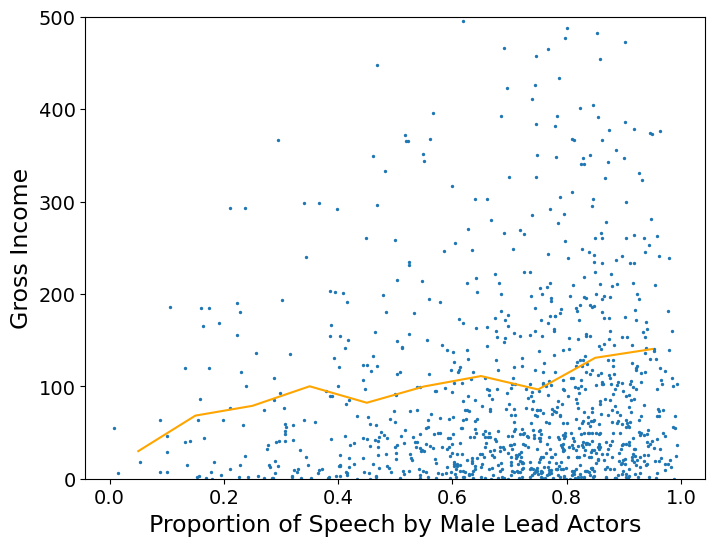

In [36]:
msgr = pd.DataFrame()
male_speaking=list()
year=list()
gr=list()

for i in range(1039):
    if d2.iloc[i,4]=="Male":
        male_speaking.append(d2.iloc[i,0]+d2.iloc[i,3])
        year.append(d2.iloc[i,5])
        gr.append(d2.iloc[i,6])
    else:
        male_speaking.append(d2.iloc[i,3])
        year.append(d2.iloc[i,5])
        gr.append(d2.iloc[i,6])

msgr = pd.DataFrame( {"ms":male_speaking, "gr":gr} )
xx = np.cumsum( [0.1]*10 )
yy = []
for i in xx:
    yy.append( np.mean(msgr[ np.logical_and(msgr["ms"]<i, msgr["ms"]> i-0.1) ]["gr"]) )

plt.figure(figsize=(8,6))
plt.scatter(male_speaking, gr, s=2)
plt.rcParams.update({'font.size': 14})
plt.xlabel("Proportion of Speech by Male Lead Actors", fontsize = 17)
plt.ylabel("Gross Income", fontsize = 17)

plt.plot(xx-0.05, yy, color="orange")

plt.ylim([0,500])
plt.show()